# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer,load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [3]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.21772837063748762
평가 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [5]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Linear SVR 학습 데이터 점수: {}'.format(linear_svr.score(X_train, y_train)))
print('Linear SVR 평가 데이터 점수: {}'.format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print('Polynomial SVR 학습 데이터 점수: {}'.format(linear_svr.score(X_train, y_train)))
print('Polynomial SVR 평가 데이터 점수: {}'.format(linear_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print('RBF SVR 학습 데이터 점수: {}'.format(linear_svr.score(X_train, y_train)))
print('RBF SVR 평가 데이터 점수: {}'.format(linear_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: 0.7155066205123104
Linear SVR 평가 데이터 점수: 0.6380398541381507
Polynomial SVR 학습 데이터 점수: 0.7155066205123104
Polynomial SVR 평가 데이터 점수: 0.6380398541381507
RBF SVR 학습 데이터 점수: 0.7155066205123104
RBF SVR 평가 데이터 점수: 0.6380398541381507


In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Linear SVC 학습 데이터 점수: {}'.format(linear_svr.score(X_train, y_train)))
print('Linear SVC 평가 데이터 점수: {}'.format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print('Polynomial SVR 학습 데이터 점수: {}'.format(polynomial_svr.score(X_train, y_train)))
print('Polynomial SVR 평가 데이터 점수: {}'.format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print('RBF SVR 학습 데이터 점수: {}'.format(rbf_svr.score(X_train, y_train)))
print('RBF SVR 평가 데이터 점수: {}'.format(rbf_svr.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.26057518952257797
Linear SVC 평가 데이터 점수: -0.0261508938933126
Polynomial SVR 학습 데이터 점수: 0.5492121168675824
Polynomial SVR 평가 데이터 점수: 0.33076721394152164
RBF SVR 학습 데이터 점수: 0.7141833202421761
RBF SVR 평가 데이터 점수: 0.7625209396028008


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [7]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [8]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print('kernel=poly, degree={}, C={}, gamma={}'.format(2, 0-.1, 'auto'))
print('Polynomial SVC 학습 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))
print('Polynomial SVC 평가 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))

kernel=poly, degree=2, C=-0.1, gamma=auto
Polynomial SVC 학습 데이터 점수: 0.993006993006993
Polynomial SVC 평가 데이터 점수: 0.993006993006993


In [9]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print('kernel=poly, C={}, gamma={}'.format(2.0, 'scale'))
print('RBF SVC 학습 데이터 점수: {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 점수: {}'.format(rbf_svc.score(X_test, y_test)))

kernel=poly, C=2.0, gamma=scale
RBF SVC 학습 데이터 점수: 0.9154929577464789
RBF SVC 평가 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [10]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [11]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [16]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [19]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6904793500964637
평가 데이터 점수: 0.7690742196117539


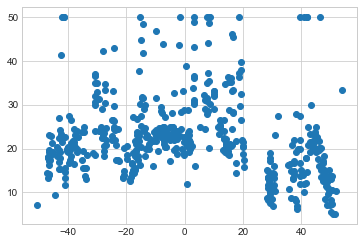

In [20]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

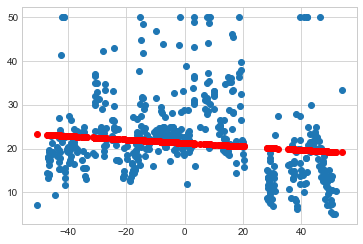

In [21]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [22]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.0119679 , 0.01097035, 0.01097083, 0.01196837, 0.01097131]),
 'score_time': array([0.00099683, 0.00199437, 0.00099754, 0.00099754, 0.00199461]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [23]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [24]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [25]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [28]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.4988178957944511
평가 데이터 점수: 0.543874179946564


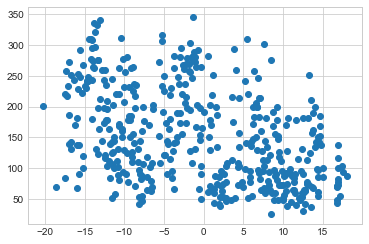

In [29]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

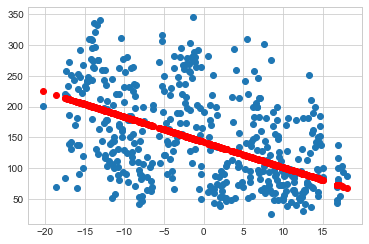

In [30]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [31]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00695848, 0.00498605, 0.00498605, 0.00598359, 0.00598407]),
 'score_time': array([0.00199628, 0.00099754, 0.00199556, 0.00099802, 0.00199533]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [32]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [33]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [34]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [37]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.666122235136994
평가 데이터 점수: 0.7264802142083959


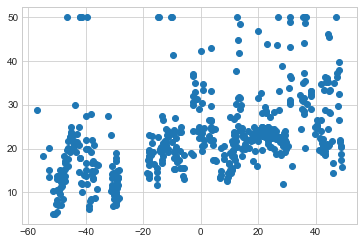

In [38]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

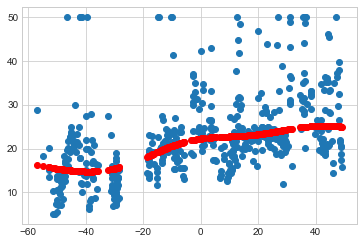

In [39]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [40]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00997305, 0.00997305, 0.00997305, 0.00897408, 0.0099721 ]),
 'score_time': array([0.0039897 , 0.0039897 , 0.0039897 , 0.00498796, 0.00598574]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [41]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.17631266        nan 0.14981591]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=6,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [42]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [43]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

### 당뇨병

In [44]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [47]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.1594497095590972
평가 데이터 점수: 0.18743302044951915


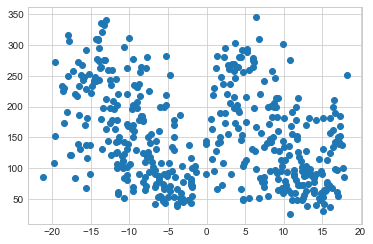

In [48]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

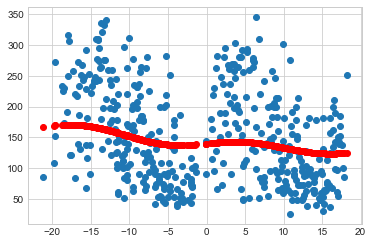

In [49]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [50]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00698137, 0.00698137, 0.0069809 , 0.00797796, 0.00698066]),
 'score_time': array([0.0039897 , 0.0039897 , 0.00398898, 0.00299191, 0.00299191]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [51]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.14659936        nan 0.34913589]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=6,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [52]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [53]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

In [54]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

In [55]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.1594639016249212
평가 데이터 점수: 0.18745254438394443


## Linear SVC

### 유방암

In [56]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [59]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9934065934065934
평가 데이터 점수: 0.9385964912280702


In [60]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

In [61]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [62]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

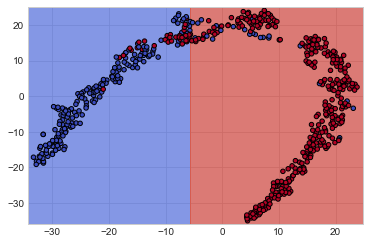

In [63]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [64]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0039897 , 0.00299191, 0.00398898, 0.00299168, 0.00299168]),
 'score_time': array([0.00099707, 0.        , 0.        , 0.        , 0.00099802]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [65]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [66]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [67]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [68]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.956140350877193


### 붓꽃

In [69]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [72]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [73]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

In [74]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [75]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

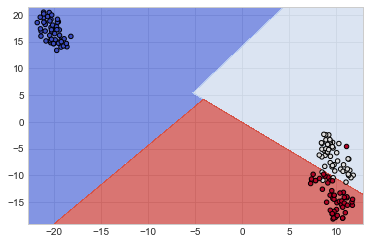

In [76]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [77]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099683, 0.00099683, 0.00199556, 0.00099874, 0.00199556]),
 'score_time': array([0.        , 0.00099874, 0.        , 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [78]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [79]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [80]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [81]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


### 와인

In [82]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [85]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9722222222222222


In [86]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

In [87]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [88]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

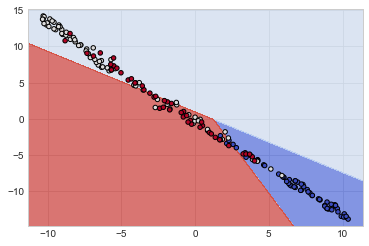

In [89]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [90]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099802, 0.00199604, 0.00099802, 0.00199604, 0.00199223]),
 'score_time': array([0.00099802, 0.        , 0.00099802, 0.        , 0.        ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [91]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [92]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [93]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [94]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9929577464788732
평가 데이터 점수: 1.0


## Kernel SVC

### 유방암

In [96]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [101]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9824175824175824
평가 데이터 점수: 0.32456140350877194


In [102]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

In [103]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [104]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

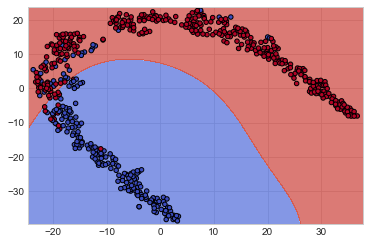

In [105]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [107]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))


cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.2s finished


{'fit_time': array([0.00398946, 0.00398946, 0.004987  , 0.0039885 , 0.00498581]),
 'score_time': array([0.00199437, 0.00199437, 0.00299001, 0.00199389, 0.00099659]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [111]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='rbf'))])
param_grid = [{'model__gamma': ['scaler', 'auto'],
              'model__C': [0.1, 0,1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.94553641        nan        nan        nan 0.97363763
        nan 0.6274181 ]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=6,
             param_grid=[{'model__C': [0.1, 0, 1, 0.01],
                          'model__gamma': ['scaler', 'auto']}],
             verbose=True)

In [112]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, gamma='auto'))])

In [113]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, gamma='auto'))])

In [114]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9824175824175824
평가 데이터 점수: 0.32456140350877194


### 붓꽃

In [115]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [118]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 1.0


In [119]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

In [120]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [121]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

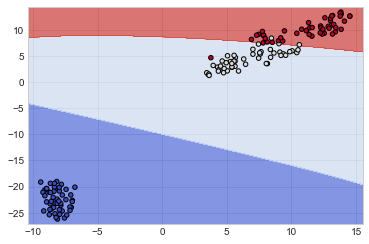

In [122]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [123]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))


cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.2s finished


{'fit_time': array([0.00199556, 0.00199294, 0.00199556, 0.00199485, 0.00199485]),
 'score_time': array([0.        , 0.        , 0.        , 0.00099778, 0.00099778]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [124]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='rbf'))])
param_grid = [{'model__gamma': ['scaler', 'auto'],
              'model__C': [0.1, 0,1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.92              nan        nan        nan 0.96666667
        nan 0.88666667]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=6,
             param_grid=[{'model__C': [0.1, 0, 1, 0.01],
                          'model__gamma': ['scaler', 'auto']}],
             verbose=True)

In [125]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, gamma='auto'))])

In [126]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, gamma='auto'))])

In [127]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 1.0


### 와인

In [128]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [131]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0


In [132]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

In [133]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [134]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

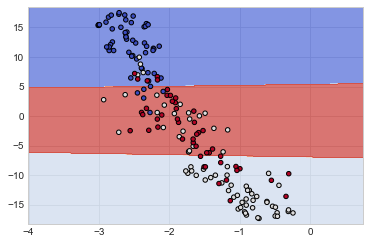

In [135]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [136]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))


cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099802, 0.00199509, 0.00199509, 0.00199437, 0.00199437]),
 'score_time': array([0.00099707, 0.        , 0.0009973 , 0.        , 0.00099659]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [137]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='rbf'))])
param_grid = [{'model__gamma': ['scaler', 'auto'],
              'model__C': [0.1, 0,1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.96634921        nan        nan        nan 0.98333333
        nan 0.39904762]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=6,
             param_grid=[{'model__C': [0.1, 0, 1, 0.01],
                          'model__gamma': ['scaler', 'auto']}],
             verbose=True)

In [138]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, gamma='auto'))])

In [139]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, gamma='auto'))])

In [140]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0
